# Projeto 5: Classificação de Texto e Análise de Sentimentos

- Base de dados: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Etapa 1: Importação das bibliotecas

In [112]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Importação da base de dados

In [147]:
df_alexa = pd.read_csv('/content/amazon-alexa.tsv', sep = '\t')

In [148]:
df_alexa.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [115]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [116]:
df_alexa.tail(10)

rating       date   variation  \
3140       4  30-Jul-18  White  Dot   
3141       3  30-Jul-18  Black  Dot   
3142       4  30-Jul-18  White  Dot   
3143       5  30-Jul-18  Black  Dot   
3144       5  30-Jul-18  Black  Dot   
3145       5  30-Jul-18  Black  Dot   
3146       5  30-Jul-18  Black  Dot   
3147       5  30-Jul-18  Black  Dot   
3148       5  30-Jul-18  White  Dot   
3149       4  29-Jul-18  Black  Dot   

                                       verified_reviews  feedback  
3140                                              Barry         1  
3141                                                            1  
3142  My three year old loves it.  Good for doing ba...         1  
3143         Awesome device wish I bought one ages ago.         1  
3144                                            love it         1  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1

In [149]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Etapa 3: Visualização dos dados

In [118]:
positive = df_alexa[df_alexa['feedback'] == 1]

In [119]:
positive

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[2893 rows x 5 columns]

In [120]:
negative = df_alexa[df_alexa['feedback'] == 0]

In [121]:
negative

rating       date             variation  \
46         2  30-Jul-18      Charcoal Fabric    
111        2  30-Jul-18      Charcoal Fabric    
141        1  30-Jul-18      Charcoal Fabric    
162        1  30-Jul-18     Sandstone Fabric    
176        2  30-Jul-18  Heather Gray Fabric    
...      ...        ...                   ...   
3047       1  30-Jul-18            Black  Dot   
3048       1  30-Jul-18            White  Dot   
3067       2  30-Jul-18            Black  Dot   
3091       1  30-Jul-18            Black  Dot   
3096       1  30-Jul-18            White  Dot   

                                       verified_reviews  feedback  
46    It's like Siri, in fact, Siri answers more acc...         0  
111   Sound is terrible if u want good music too get...         0  
141                                  Not much features.         0  
162   Stopped working after 2 weeks ,didn't follow c...         0  
176                                Sad joke. Worthless.         0  
...                                                 ...       ...  
3047  Echo Dot responds to us when we aren't even ta...         0  
3048              NOT CONNECTED TO MY PHONE PLAYLIST :(         0  
3067  The only negative we have on this product is t...         0  
3091                                  I didn’t order it         0  
3096  The product sounded the same as the emoji spea...         0  

[257 rows x 5 columns]

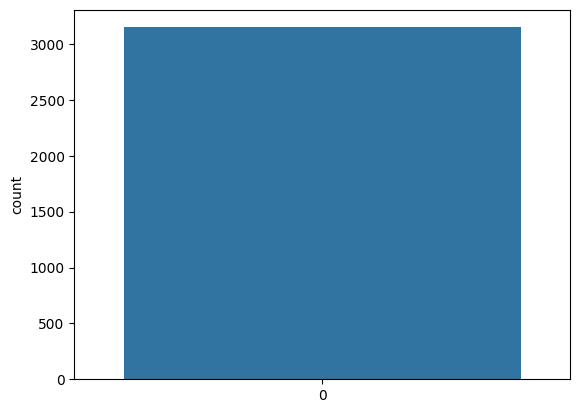

In [122]:
sns.countplot(df_alexa['feedback'], label = 'Count');

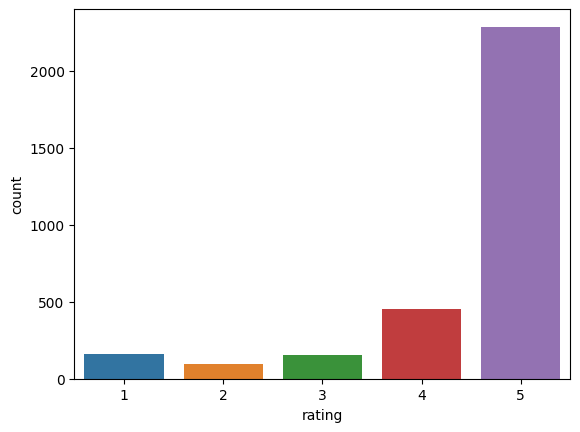

In [123]:
sns.countplot(x = 'rating', data = df_alexa);

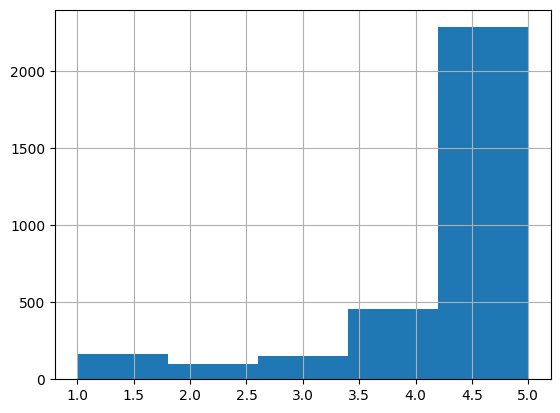

In [124]:
df_alexa['rating'].hist(bins = 5);

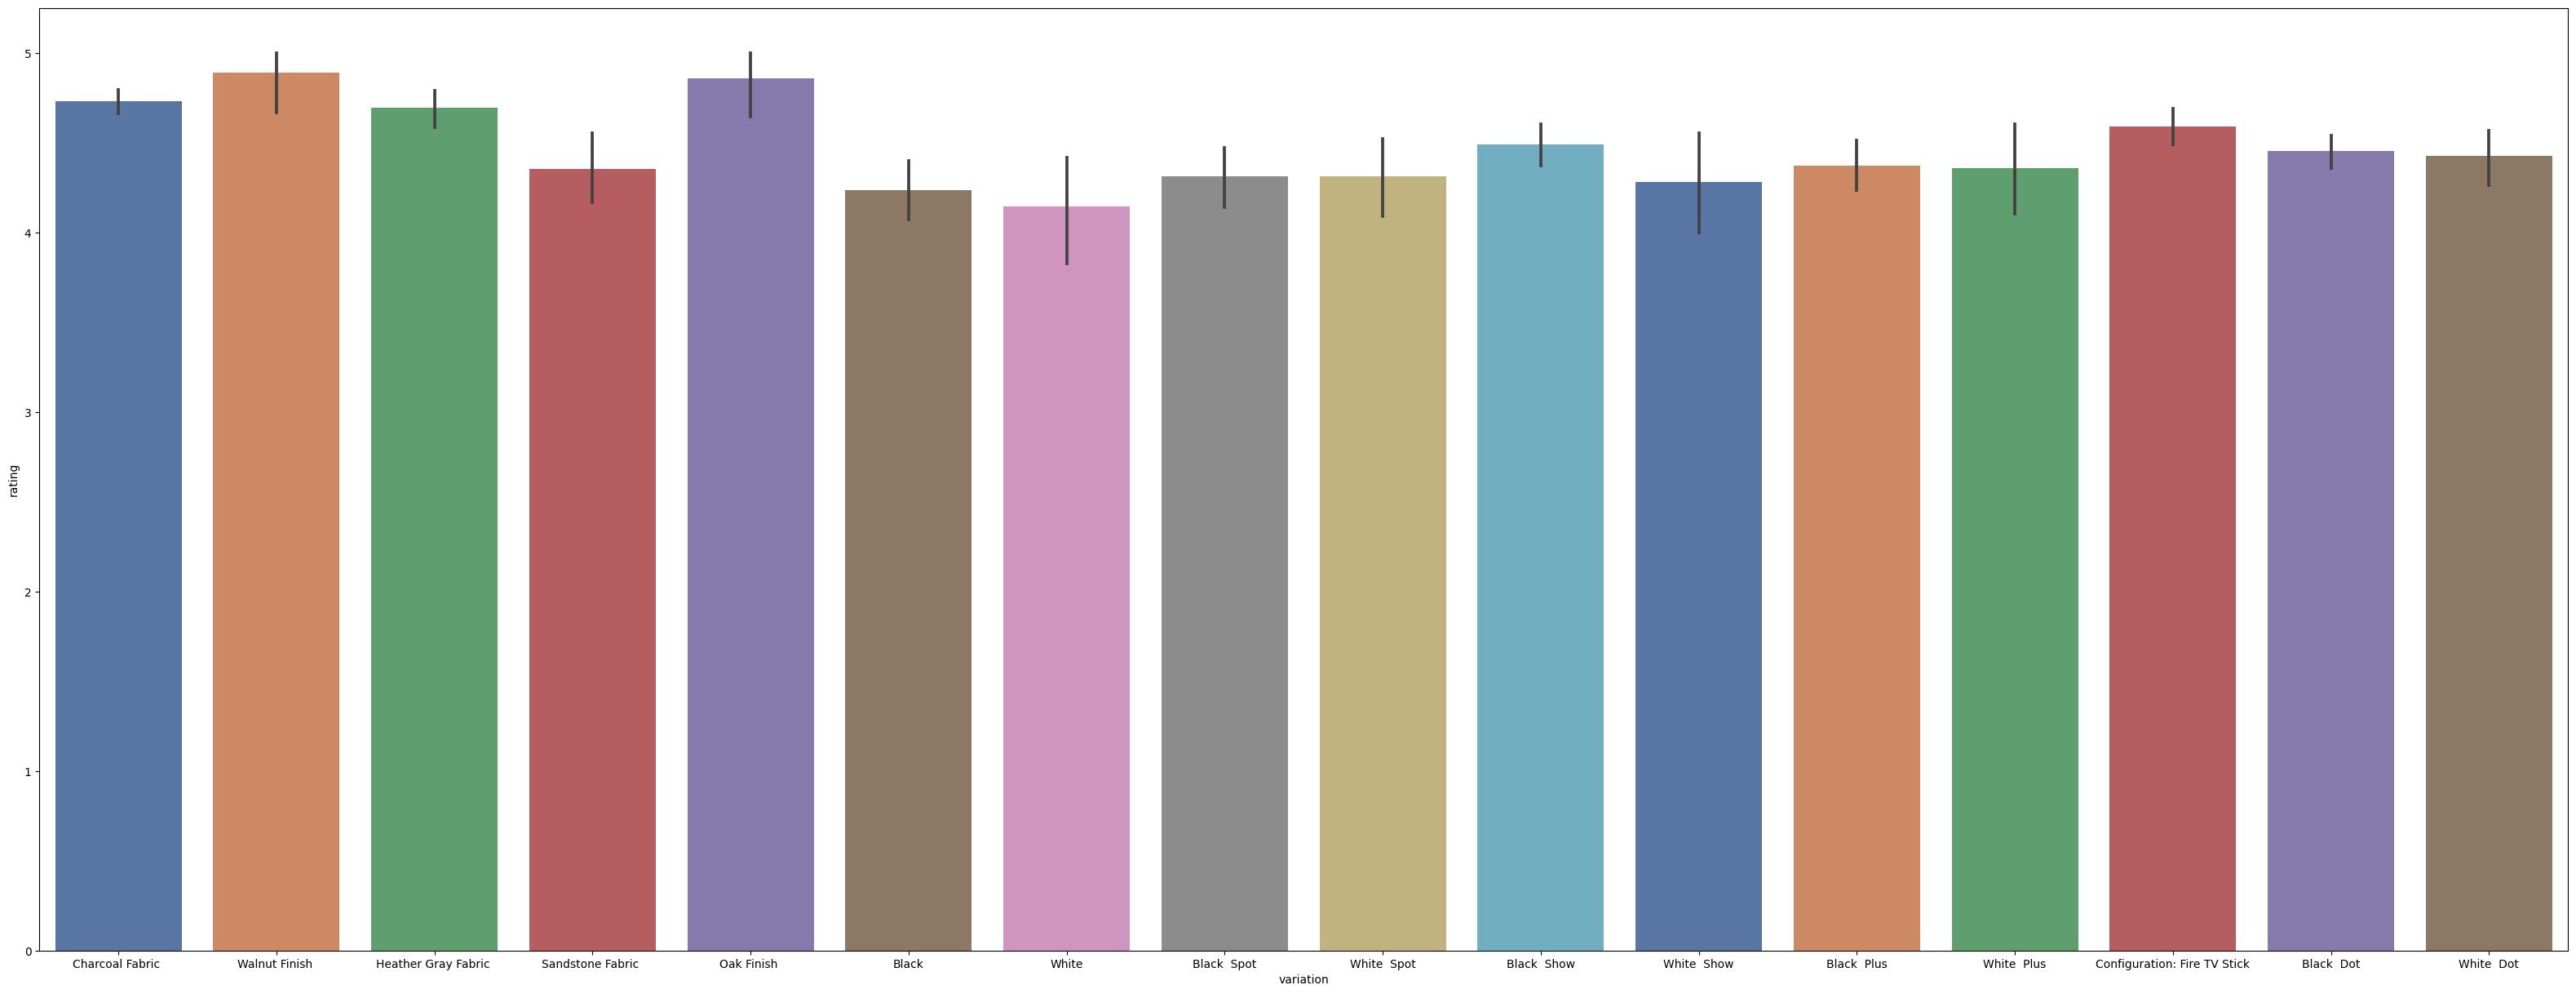

In [125]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep');

# Etapa 4: Limpeza dos dados

In [150]:
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [127]:
df_alexa.head()

variation                                   verified_reviews  \
0  Charcoal Fabric                                       Love my Echo!   
1  Charcoal Fabric                                           Loved it!   
2    Walnut Finish   Sometimes while playing a game, you can answer...   
3  Charcoal Fabric   I have had a lot of fun with this thing. My 4 ...   
4  Charcoal Fabric                                               Music   

   feedback  
0         1  
1         1  
2         1  
3         1  
4         1

In [151]:
variation_dummies = pd.get_dummies(df_alexa['variation'])
#This command creates a new table that assign a binary value to the register in the dataset
#If variation is equal to Charcoal Fabric, it will show the '1' value in the Charcoal Fabric column and '0' for the rest

In [129]:
variation_dummies

Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0         0           0            0            0            0   
1         0           0            0            0            0   
2         0           0            0            0            0   
3         0           0            0            0            0   
4         0           0            0            0            0   
...     ...         ...          ...          ...          ...   
3145      0           1            0            0            0   
3146      0           1            0            0            0   
3147      0           1            0            0            0   
3148      0           0            0            0            0   
3149      0           1            0            0            0   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0                    1                             0                     0   
1                    1                             0                     0   
2                    0                             0                     0   
3                    1                             0                     0   
4                    1                             0                     0   
...                ...                           ...                   ...   
3145                 0                             0                     0   
3146                 0                             0                     0   
3147                 0                             0                     0   
3148                 0                             0                     0   
3149                 0                             0                     0   

      Oak Finish   Sandstone Fabric   Walnut Finish   White  White  Dot  \
0               0                  0               0      0           0   
1               0                  0               0      0           0   
2               0                  0               1      0           0   
3               0                  0               0      0           0   
4               0                  0               0      0           0   
...           ...                ...             ...    ...         ...   
3145            0                  0               0      0           0   
3146            0                  0               0      0           0   
3147            0                  0               0      0           0   
3148            0                  0               0      0           1   
3149            0                  0               0      0           0   

      White  Plus  White  Show  White  Spot  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            0  
...           ...          ...          ...  
3145            0            0            0  
3146            0            0            0  
3147            0            0            0  
3148            0            0            0  
3149            0            0            0  

[3150 rows x 16 columns]

In [152]:
df_alexa.drop(['variation'], axis = 1, inplace=True)

In [131]:
df_alexa.head()

verified_reviews  feedback
0                                      Love my Echo!         1
1                                          Loved it!         1
2  Sometimes while playing a game, you can answer...         1
3  I have had a lot of fun with this thing. My 4 ...         1
4                                              Music         1

In [153]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1)#Get togheter both tables

In [138]:
df_alexa.head()

Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0      0           0            0            0            0                 1   
1      0           0            0            0            0                 1   
2      0           0            0            0            0                 0   
3      0           0            0            0            0                 1   
4      0           0            0            0            0                 1   

   Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                             0                     0            0   
1                             0                     0            0   
2                             0                     0            0   
3                             0                     0            0   
4                             0                     0            0   

   Sandstone Fabric   ...  Configuration: Fire TV Stick  Heather Gray Fabric   \
0                  0  ...                             0                     0   
1                  0  ...                             0                     0   
2                  0  ...                             0                     0   
3                  0  ...                             0                     0   
4                  0  ...                             0                     0   

   Oak Finish   Sandstone Fabric   Walnut Finish   White  White  Dot  \
0            0                  0               0      0           0   
1            0                  0               0      0           0   
2            0                  0               1      0           0   
3            0                  0               0      0           0   
4            0                  0               0      0           0   

   White  Plus  White  Show  White  Spot  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 32 columns]

# Exemplo de tokenização


In [139]:
from sklearn.feature_extraction.text import CountVectorizer

In [140]:
sample_data = ['This is the first document.',
               'This document is the second document.',
               'And this is the third one.',
               'Is this the first document?']

In [141]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)#Vetorize the texts

In [142]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)#Show all the substrings in the texts

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [143]:
print(X.toarray())#Show the amount of times each word appears in each line

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Tokenização da base de dados

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [136]:
alexa_countvectorizer.shape

(3150, 4044)

In [ ]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [ ]:
print(vectorizer.get_feature_names_out())#Show all the substrings in the texts

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [ ]:
print(alexa_countvectorizer.toarray())#show the frequency table

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [155]:
df_alexa.drop(['verified_reviews'], axis = 1, inplace=True)


In [156]:
df_alexa.head()

feedback  Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0         1      0           0            0            0            0   
1         1      0           0            0            0            0   
2         1      0           0            0            0            0   
3         1      0           0            0            0            0   
4         1      0           0            0            0            0   

   Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0                 1                             0                     0   
1                 1                             0                     0   
2                 0                             0                     0   
3                 1                             0                     0   
4                 1                             0                     0   

   Oak Finish   Sandstone Fabric   Walnut Finish   White  White  Dot  \
0            0                  0               0      0           0   
1            0                  0               0      0           0   
2            0                  0               1      0           0   
3            0                  0               0      0           0   
4            0                  0               0      0           0   

   White  Plus  White  Show  White  Spot  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0

In [ ]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())
#Convert a sparse matrix representation in a NumPy array

In [ ]:
reviews.head()

0     1     2     3     4     5     6     7     8     9     ...  4034  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   4035  4036  4037  4038  4039  4040  4041  4042  4043  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     1     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 4044 columns]

In [157]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)#Get thogheter both datasets

In [ ]:
df_alexa.head()

feedback  Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0         1      0           0            0            0            0   
1         1      0           0            0            0            0   
2         1      0           0            0            0            0   
3         1      0           0            0            0            0   
4         1      0           0            0            0            0   

   Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0                 1                             0                     0   
1                 1                             0                     0   
2                 0                             0                     0   
3                 1                             0                     0   
4                 1                             0                     0   

   Oak Finish   ...  4034  4035  4036  4037  4038  4039  4040  4041  4042  \
0            0  ...     0     0     0     0     0     0     0     0     0   
1            0  ...     0     0     0     0     0     0     0     0     0   
2            0  ...     0     0     0     0     0     0     0     0     0   
3            0  ...     0     1     0     0     0     0     0     0     0   
4            0  ...     0     0     0     0     0     0     0     0     0   

   4043  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 4061 columns]

In [159]:
X = df_alexa.drop(['feedback'], axis = 1)

In [ ]:
X

Black  Black  Dot  Black  Plus  Black  Show  ...  4040  4041  4042  4043
0         0           0            0            0  ...     0     0     0     0
1         0           0            0            0  ...     0     0     0     0
2         0           0            0            0  ...     0     0     0     0
3         0           0            0            0  ...     0     0     0     0
4         0           0            0            0  ...     0     0     0     0
...     ...         ...          ...          ...  ...   ...   ...   ...   ...
3145      0           1            0            0  ...     0     0     0     0
3146      0           1            0            0  ...     0     0     0     0
3147      0           1            0            0  ...     0     0     0     0
3148      0           0            0            0  ...     0     0     0     0
3149      0           1            0            0  ...     0     0     0     0

[3150 rows x 4060 columns]

In [ ]:
y = df_alexa['feedback']

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(2520, 4060)

In [ ]:
X_test.shape

(630, 4060)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
# 4060 neurons connects to other 400 neurons that connects to other 400 neurons that connects to other 1
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu', input_shape=(4060,)))
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
#The sigmoid function will return a output value between 0 and 1. It can be considered a porcentage

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               1624400   
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1785201 (6.81 MB)
Trainable params: 1785201 (6.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Compile our neural network
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
#metrics => Define which metrics will be used as a evaluation parameter

In [ ]:
#Train the neural network n
epochs_hist = classifier.fit(X_train, y_train, epochs=10)
#Default batch_size = 32
#When we dont specify the validation_loss, it doesnt apply this validation
#2520/32=79

Epoch 1/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0135 - accuracy: 0.9944
Epoch 2/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0139 - accuracy: 0.9933
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0132 - accuracy: 0.9944
Epoch 4/10
79/79 [==============================] - 2s 23ms/step - loss: 0.0135 - accuracy: 0.9944
Epoch 5/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0132 - accuracy: 0.9944
Epoch 6/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0132 - accuracy: 0.9944
Epoch 7/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0133 - accuracy: 0.9940
Epoch 8/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0131 - accuracy: 0.9948
Epoch 9/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0130 - accuracy: 0.9937
Epoch 10/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0130 - accuracy: 0.9944


# Etapa 6: Avaliação do modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_train = classifier.predict(X_train)#Try predict a value using the train data as a independent variable
y_pred_train#Show values

79/79 [==============================] - 0s 6ms/step


array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.60563105],
       [0.99999905],
       [0.99999994]], dtype=float32)

In [ ]:
y_pred_train = (y_pred_train > 0.5)
#Assign "True" value if the vale is biggest than 0,5 and "False" it is not
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
cm
#array([[ True positives,  False positives],
#       [ False positives, True negatives]])

array([[ 191,   11],
       [   2, 2316]])

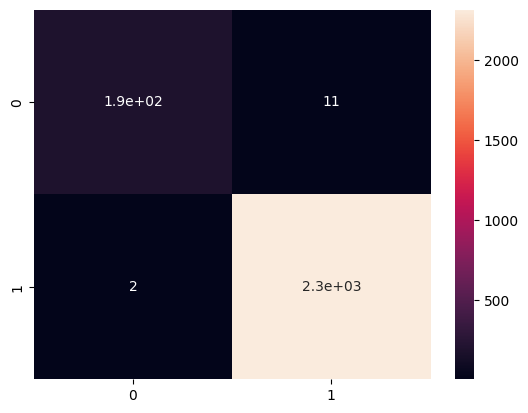

In [ ]:
sns.heatmap(cm, annot=True);#Graphic representation

In [ ]:
y_pred_test = classifier.predict(X_test)#Try predict using the test data
y_pred_test = (y_pred_test > 0.5)
#Assign "True" value if the vale is biggest than 0,5 and "False" it is not
cm = confusion_matrix(y_test, y_pred_test)#Create the confusion matrix
cm
#array([[ True positives,  False positives],
#       [ False positives, True negatives]])

20/20 [==============================] - 0s 5ms/step


array([[ 20,  35],
       [ 10, 565]])

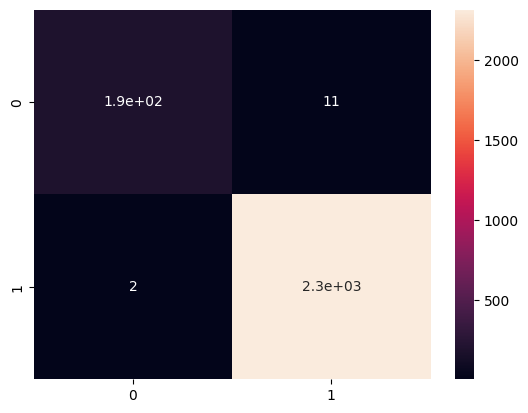

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

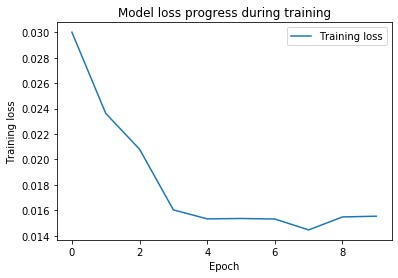

In [ ]:
#Show the loss according the epoch
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

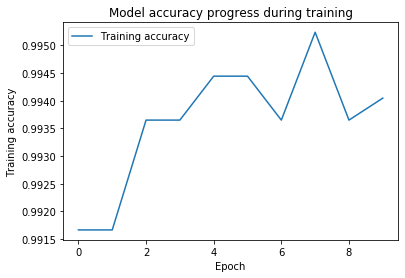

In [ ]:
#Show the accuracy according the epoch
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])